In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib
import os
import time
import tracemalloc
import numpy as np
import pandas as pd
import sklearn
import sys

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
print("===== ENVIRONMENT INFO =====")
print("Python Version      :", sys.version)
print("NumPy Version       :", np.__version__)
print("Pandas Version      :", pd.__version__)
print("Scikit-learn Version:", sklearn.__version__)
print("Joblib Version      :", joblib.__version__)

===== ENVIRONMENT INFO =====
Python Version      : 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
NumPy Version       : 2.0.2
Pandas Version      : 2.2.2
Scikit-learn Version: 1.6.1
Joblib Version      : 1.5.3


In [ ]:
# Membaca dataset
df = pd.read_csv('/content/Dataset2.csv')

# menampilkan beberapa baris pertama
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [ ]:
df.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [ ]:
df.isnull().sum()

,0
user_id,0
signup_time,0
purchase_time,0
purchase_value,0
device_id,0
source,0
browser,0
sex,0
age,0
ip_address,0


In [ ]:
print("=== Nilai Unik Setiap Kolom ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

=== Nilai Unik Setiap Kolom ===
user_id: 151112 unique values
signup_time: 151112 unique values
purchase_time: 150679 unique values
purchase_value: 122 unique values
device_id: 137956 unique values
source: 3 unique values
browser: 5 unique values
sex: 2 unique values
age: 58 unique values
ip_address: 143512 unique values
class: 2 unique values


In [ ]:
print("===  Jumlah Baris Setiap Nilai ===\n")
for col in df.columns:
    print(f"Kolom: {col}")
    print("Jumlah baris setiap nilai:")
    print(df[col].value_counts())
    print("-" * 50)


===  Jumlah Baris Setiap Nilai ===

Kolom: user_id
Jumlah baris setiap nilai:
user_id
138208    1
22058     1
333320    1
1359      1
150084    1
         ..
79203     1
73884     1
199700    1
182338    1
159045    1
Name: count, Length: 151112, dtype: int64
--------------------------------------------------
Kolom: signup_time
Jumlah baris setiap nilai:
signup_time
2015-06-10 07:02:20    1
2015-02-24 22:55:49    1
2015-06-07 20:39:50    1
2015-01-01 18:52:44    1
2015-04-28 21:13:25    1
                      ..
2015-06-16 21:19:35    1
2015-05-29 16:22:02    1
2015-07-11 18:26:54    1
2015-01-25 17:49:49    1
2015-04-21 23:38:34    1
Name: count, Length: 151112, dtype: int64
--------------------------------------------------
Kolom: purchase_time
Jumlah baris setiap nilai:
purchase_time
2015-07-17 23:22:55    3
2015-06-08 09:42:04    3
2015-09-10 09:04:53    3
2015-08-21 07:30:50    2
2015-11-11 22:52:46    2
                      ..
2015-02-19 13:40:15    1
2015-09-07 09:37:52    1
2

In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

separate_iqr_summary = []

for col in num_cols:

    # --- IQR khusus kelas fraud ---
    fraud_data = df[df['class'] == 1][col]
    Q1_f = fraud_data.quantile(0.25)
    Q3_f = fraud_data.quantile(0.75)
    IQR_f = Q3_f - Q1_f
    lower_f = Q1_f - 1.5 * IQR_f
    upper_f = Q3_f + 1.5 * IQR_f

    fraud_outlier = ((fraud_data < lower_f) | (fraud_data > upper_f)).sum()
    total_fraud = fraud_data.shape[0]

    # --- IQR khusus kelas non-fraud ---
    nonfraud_data = df[df['class'] == 0][col]
    Q1_nf = nonfraud_data.quantile(0.25)
    Q3_nf = nonfraud_data.quantile(0.75)
    IQR_nf = Q3_nf - Q1_nf
    lower_nf = Q1_nf - 1.5 * IQR_nf
    upper_nf = Q3_nf + 1.5 * IQR_nf

    nonfraud_outlier = ((nonfraud_data < lower_nf) | (nonfraud_data > upper_nf)).sum()
    total_nonfraud = nonfraud_data.shape[0]

    separate_iqr_summary.append({
        'Fitur': col,
        'Outlier Fraud (per-IQR fraud)': fraud_outlier,
        'Persentase Fraud (%)': (fraud_outlier / total_fraud * 100) if total_fraud > 0 else 0,
        'Outlier Non-Fraud (per-IQR non-fraud)': nonfraud_outlier,
        'Persentase Non-Fraud (%)': (nonfraud_outlier / total_nonfraud * 100) if total_nonfraud > 0 else 0
    })

separate_outlier_df = pd.DataFrame(separate_iqr_summary)

print("Outlier dengan IQR dihitung terpisah per kelas:")
print(separate_outlier_df)

Outlier dengan IQR dihitung terpisah per kelas:
            Fitur  Outlier Fraud (per-IQR fraud)  Persentase Fraud (%)  \
0         user_id                              0              0.000000   
1  purchase_value                             99              0.699597   
2             age                             79              0.558264   
3      ip_address                              0              0.000000   
4           class                              0              0.000000   

   Outlier Non-Fraud (per-IQR non-fraud)  Persentase Non-Fraud (%)  
0                                      0                  0.000000  
1                                    968                  0.706771  
2                                    697                  0.508904  
3                                      0                  0.000000  
4                                      0                  0.000000  


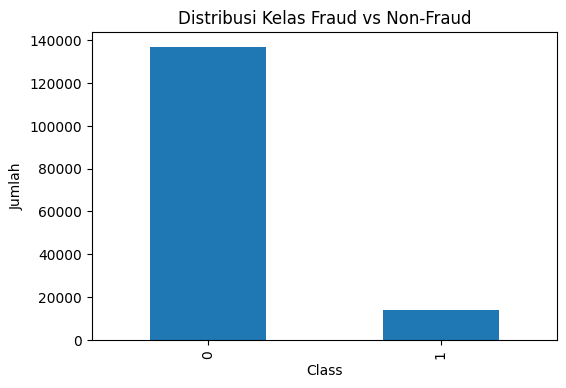

In [ ]:
#Distribusi kelas (Fraud vs Non-Fraud) ---
plt.figure(figsize=(6,4))
df['class'].value_counts().plot(kind='bar')
plt.title("Distribusi Kelas Fraud vs Non-Fraud")
plt.xlabel("Class")
plt.ylabel("Jumlah")
plt.show()


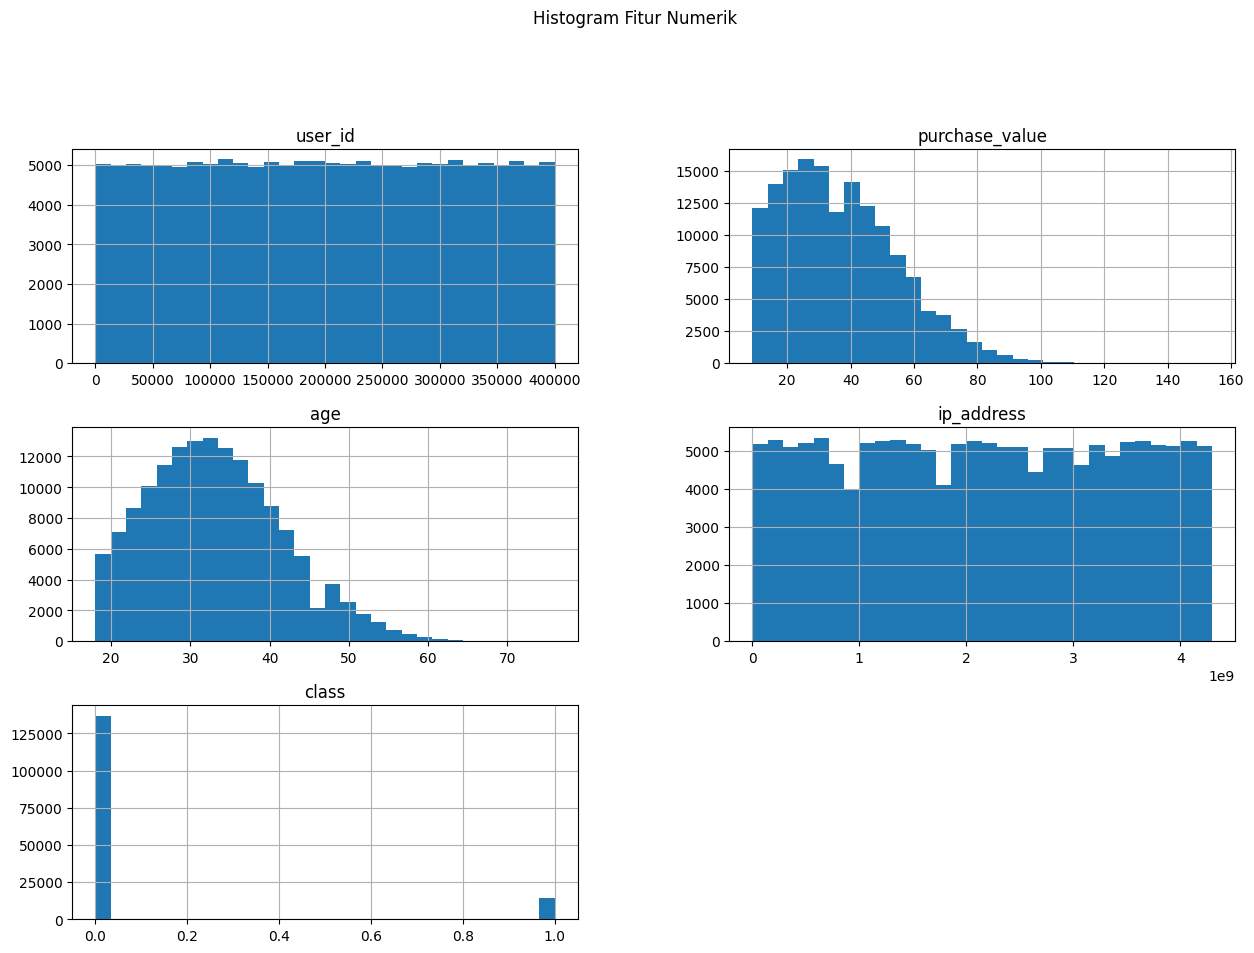

In [ ]:
#Histogram fitur numerik ---
df.hist(figsize=(15,10), bins=30)
plt.suptitle("Histogram Fitur Numerik", y=1.02)
plt.show()


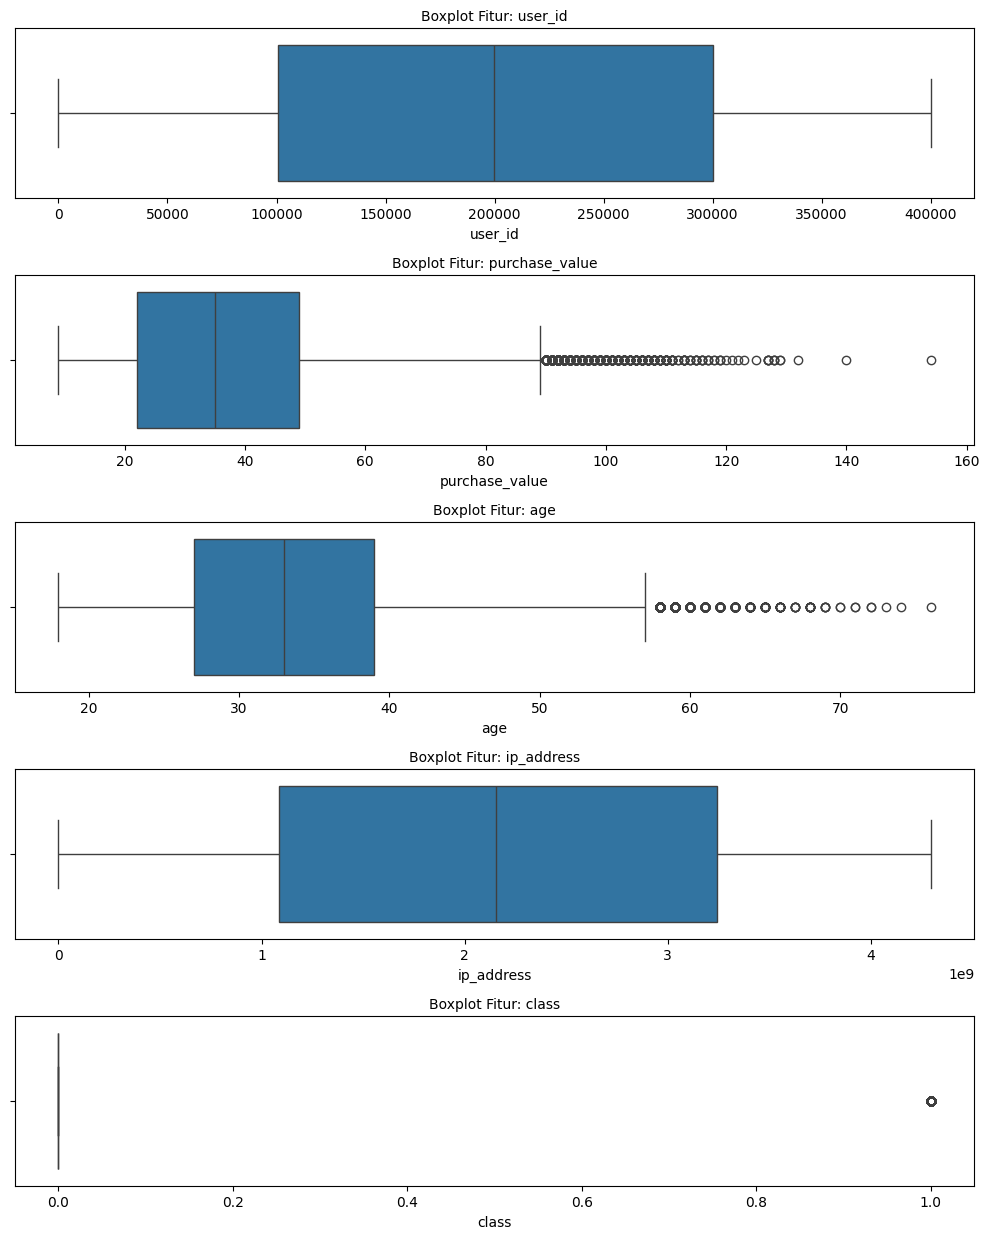

In [ ]:
#Boxplot untuk mendeteksi outlier ---
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

plt.figure(figsize=(10, 2.5 * len(num_cols)))  # ⬅️ DIPERKECIL

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot Fitur: {col}", fontsize=10)
    plt.tight_layout()

plt.show()


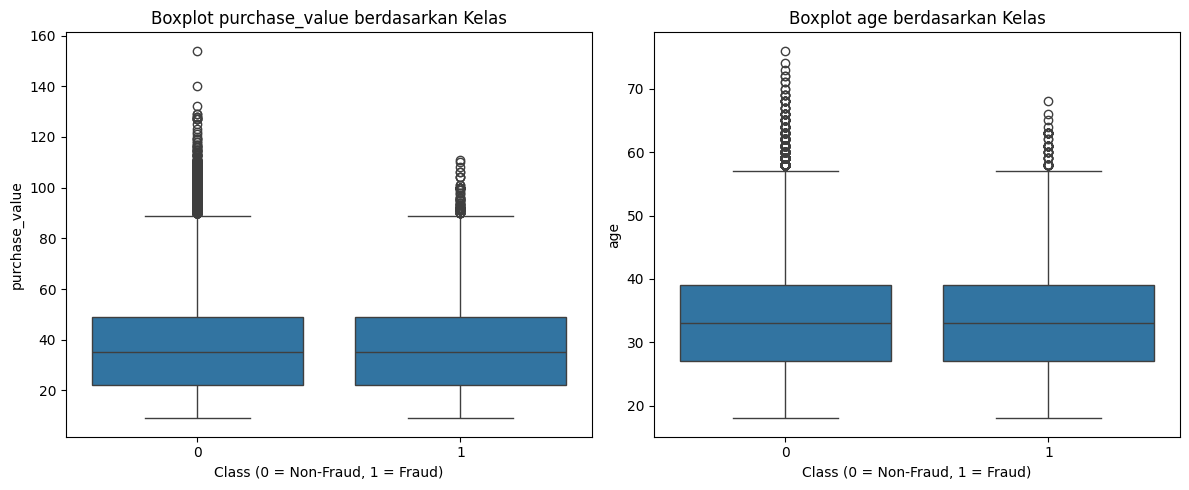

In [ ]:
features_to_plot = ['purchase_value', 'age']

plt.figure(figsize=(12, 5))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='class', y=feature, data=df)
    plt.title(f'Boxplot {feature} berdasarkan Kelas')
    plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


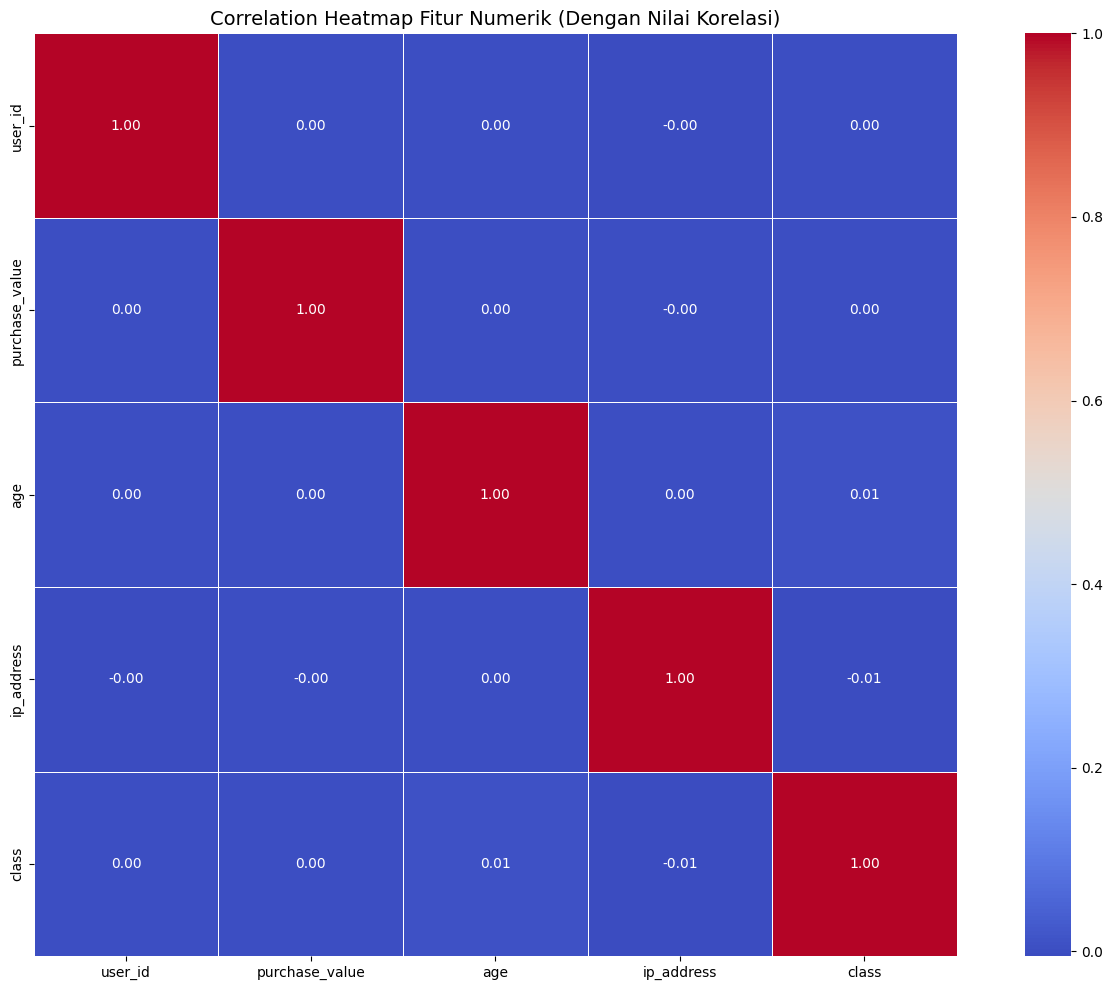

In [ ]:
plt.figure(figsize=(14,10))
numeric_df = df.select_dtypes(include=['number'])
numeric_corr = numeric_df.corr()
sns.heatmap(
    numeric_corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True
)
plt.title("Correlation Heatmap Fitur Numerik (Dengan Nilai Korelasi)", fontsize=14)
plt.tight_layout()
plt.show()


#Data Split

In [ ]:
# FEATURE ENGINEERING


# Convert time columns to datetime objects
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

# --- 1. time_diff (selisih waktu antara signup & purchase dalam detik)
df['time_diff'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds()

# Jika ada nilai negatif atau NaT, ubah jadi 0
df['time_diff'] = df['time_diff'].fillna(0)
df.loc[df['time_diff'] < 0, 'time_diff'] = 0

# --- 2. purchase_hour (jam transaksi)
df['purchase_hour'] = df['purchase_time'].dt.hour

# --- 3. purchase_day (hari transaksi)
df['purchase_day'] = df['purchase_time'].dt.dayofweek   # 0 = Senin

# --- 4. value_group (kategori nilai transaksi)
df['value_group'] = pd.cut(
    df['purchase_value'],
    bins=[0, 20, 40, 80, 200],
    labels=['low', 'medium', 'high', 'very_high']
)

# --- 5. age_group (kategori umur)
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 25, 40, 60, 100],
    labels=['young', 'adult', 'middle', 'senior']
)

# --- 6. ip_freq (berapa kali IP muncul)
df['ip_freq'] = df.groupby('ip_address')['ip_address'].transform('count')

# --- 7. device_freq (berapa kali device muncul)
df['device_freq'] = df.groupby('device_id')['device_id'].transform('count')

print("=== Feature Engineering Tambahan Selesai ===")
print(df[['time_diff','purchase_hour','purchase_day','value_group','age_group','ip_freq','device_freq']].head())

=== Feature Engineering Tambahan Selesai ===
   time_diff  purchase_hour  purchase_day value_group age_group  ip_freq  \
0  4506682.0              2             5      medium     adult        1   
1    17944.0              1             0         low    middle        1   
2        1.0             18             3         low    middle       12   
3   492085.0             13             0        high    middle        1   
4  4361461.0             18             2      medium    middle        1   

   device_freq  
0            1  
1            1  
2           12  
3            1  
4            1  


In [ ]:
# Pisahkan target
y = df['class']

X = df.drop('class', axis=1).copy()
# X sementara (seluruh fitur kecuali target)
X_temp = df.drop('class', axis=1)

print("Kolom setelah drop:", X_temp.columns.tolist())
print("Shape X sementara:", X_temp.shape)

Kolom setelah drop: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'time_diff', 'purchase_hour', 'purchase_day', 'value_group', 'age_group', 'ip_freq', 'device_freq']
Shape X sementara: (151112, 17)


In [ ]:
numeric_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_features = [col for col in numeric_features if col != 'class']

numeric_features

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(df[numeric_features], y)

anova_df = pd.DataFrame({
    'Feature': numeric_features,
    'ANOVA_F_Score': selector.scores_
}).sort_values(by='ANOVA_F_Score', ascending=False)

anova_df


,Feature,ANOVA_F_Score
6,device_freq,123646.774779
5,ip_freq,115768.203285
4,time_diff,10765.732087
2,age,6.629742
3,ip_address,4.098239
0,user_id,0.571543
1,purchase_value,0.154464


In [ ]:
selected_numeric = anova_df[anova_df['ANOVA_F_Score'] > 10]['Feature'].tolist()
selected_numeric


['device_freq', 'ip_freq', 'time_diff']

In [ ]:
categorical_features = [
    'value_group', 'age_group',
    'browser', 'source', 'sex',

]

categorical_features


['value_group', 'age_group', 'browser', 'source', 'sex']

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Salin fitur kategorikal untuk chi-square
X_cat = df[categorical_features].copy()

# One-hot encode dulu (chi-square butuh angka)
X_cat_encoded = pd.get_dummies(X_cat, drop_first=True)

# Chi-Square selection
chi_selector = SelectKBest(score_func=chi2, k='all')
chi_selector.fit(X_cat_encoded, y)

# Buat tabel hasil chi square
chi_scores = pd.DataFrame({
    "Feature": X_cat_encoded.columns,
    "Chi2_Score": chi_selector.scores_
}).sort_values(by="Chi2_Score", ascending=False)

chi_scores


,Feature,Chi2_Score
10,source_Direct,49.580580
7,browser_IE,20.424917
11,source_SEO,13.581715
0,value_group_medium,10.033118
5,age_group_senior,3.685089
12,sex_M,3.665302
9,browser_Safari,3.447699
3,age_group_adult,1.960091
1,value_group_high,1.281557
2,value_group_very_high,0.891347


In [ ]:
selected_categorical = chi_scores[chi_scores['Chi2_Score'] > 10]['Feature'].tolist()
selected_categorical

['source_Direct', 'browser_IE', 'source_SEO', 'value_group_medium']

In [ ]:
# NUMERIC
X_numeric = df[selected_numeric].copy()
# KATEGORICAL
X_cat_full = pd.get_dummies(df[categorical_features], drop_first=True)

# Ambil hanya dummy terpilih
X_categorical_selected = X_cat_full[selected_categorical]

# FINAL FEATURE SELECTION
X_final = pd.concat([X_numeric, X_categorical_selected], axis=1)

print("\n=== SHAPE X_final ===")
print(X_final.shape)

print("\n=== FITUR FINAL ===")
print(list(X_final.columns))



=== SHAPE X_final ===
(151112, 7)

=== FITUR FINAL ===
['device_freq', 'ip_freq', 'time_diff', 'source_Direct', 'browser_IE', 'source_SEO', 'value_group_medium']


In [ ]:
import time
import tracemalloc
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from imblearn.under_sampling import RandomUnderSampler

# =====================================================
# FUNGSI FNR & FPR
# =====================================================
def calculate_rates(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(
        y_true, y_pred, labels=[0, 1]
    ).ravel()

    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return fnr, fpr

# =====================================================
# STRATIFIED K-FOLD (CV = 5)
# =====================================================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

nb_train_times, nb_pred_times, nb_memories = [], [], []
rf_train_times, rf_pred_times, rf_memories = [], [], []

y_true_all = []
y_pred_nb_all, y_pred_rf_all = [], []
y_pred_proba_nb_all, y_pred_proba_rf_all = [], []

# =====================================================
# CV LOOP
# =====================================================
for train_idx, test_idx in skf.split(X_final, y):

    X_train, X_test = X_final.iloc[train_idx], X_final.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # =================================================
    # RANDOM UNDER SAMPLING (TRAIN ONLY)
    # =================================================
    rus = RandomUnderSampler(random_state=42)
    X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

    # ================== SCALING ==================
    from sklearn.preprocessing import MinMaxScaler

    scaler_nb = MinMaxScaler()
    scaler_rf = MinMaxScaler()

    # NB
    X_train_nb = scaler_nb.fit_transform(X_train_rus)
    X_test_nb  = scaler_nb.transform(X_test)

    # RF
    X_train_rf = scaler_rf.fit_transform(X_train_rus)
    X_test_rf  = scaler_rf.transform(X_test)

    # =================================================
    # COMPLEMENT NAIVE BAYES
    # =================================================

    tracemalloc.start()
    start_train = time.time()

    nb_model = ComplementNB()
    nb_model.fit(X_train_nb, y_train_rus)

    end_train = time.time()
    start_pred = time.time()

    y_pred_nb = nb_model.predict(X_test_nb)
    y_pred_proba_nb = nb_model.predict_proba(X_test_nb)[:, 1]

    end_pred = time.time()
    _, peak_nb = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    nb_train_times.append(end_train - start_train)
    nb_pred_times.append(end_pred - start_pred)
    nb_memories.append(peak_nb / (1024 * 1024))

    # =================================================
    # RANDOM FOREST
    # =================================================
    tracemalloc.start()
    start_train = time.time()

    rf_model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    )
    rf_model.fit(X_train_rus, y_train_rus)

    end_train = time.time()
    start_pred = time.time()

    y_pred_rf = rf_model.predict(X_test)
    y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

    end_pred = time.time()
    _, peak_rf = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    rf_train_times.append(end_train - start_train)
    rf_pred_times.append(end_pred - start_pred)
    rf_memories.append(peak_rf / (1024 * 1024))

    # =================================================
    # SIMPAN HASIL
    # =================================================
    y_true_all.extend(y_test)
    y_pred_nb_all.extend(y_pred_nb)
    y_pred_rf_all.extend(y_pred_rf)
    y_pred_proba_nb_all.extend(y_pred_proba_nb)
    y_pred_proba_rf_all.extend(y_pred_proba_rf)

# =====================================================
# HASIL AKHIR – COMPLEMENT NAIVE BAYES
# =====================================================
print("\n================ COMPLEMENT NAIVE BAYES (CV=5) ================")
print(classification_report(y_true_all, y_pred_nb_all))
print("Accuracy :", accuracy_score(y_true_all, y_pred_nb_all))
print("Precision:", precision_score(y_true_all, y_pred_nb_all))
print("Recall   :", recall_score(y_true_all, y_pred_nb_all))
print("F1-score :", f1_score(y_true_all, y_pred_nb_all))

fnr_nb, fpr_nb = calculate_rates(y_true_all, y_pred_nb_all)
print("FNR :", fnr_nb)
print("FPR :", fpr_nb)
print("ROC AUC :", roc_auc_score(y_true_all, y_pred_proba_nb_all))
print(f"Total Training Time   : {np.sum(nb_train_times):.4f} detik")
print(f"Total Prediction Time : {np.sum(nb_pred_times):.6f} detik")
print(f"Peak Memory Usage     : {np.max(nb_memories):.2f} MB")

# =====================================================
# HASIL AKHIR – RANDOM FOREST
# =====================================================
print("\n================ RANDOM FOREST (CV=5) ================")
print(classification_report(y_true_all, y_pred_rf_all))
print("Accuracy :", accuracy_score(y_true_all, y_pred_rf_all))
print("Precision:", precision_score(y_true_all, y_pred_rf_all))
print("Recall   :", recall_score(y_true_all, y_pred_rf_all))
print("F1-score :", f1_score(y_true_all, y_pred_rf_all))

fnr_rf, fpr_rf = calculate_rates(y_true_all, y_pred_rf_all)
print("FNR :", fnr_rf)
print("FPR :", fpr_rf)
print("ROC AUC :", roc_auc_score(y_true_all, y_pred_proba_rf_all))
print(f"Total Training Time   : {np.sum(rf_train_times):.4f} detik")
print(f"Total Prediction Time : {np.sum(rf_pred_times):.6f} detik")
print(f"Peak Memory Usage     : {np.max(rf_memories):.2f} MB")



================ COMPLEMENT NAIVE BAYES (CV=5) ================
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    136961
           1       0.87      0.55      0.67     14151

    accuracy                           0.95    151112
   macro avg       0.91      0.77      0.82    151112
weighted avg       0.95      0.95      0.94    151112

Accuracy : 0.9500569114299328
Precision: 0.8659942363112392
Recall   : 0.5521164582008339
F1-score : 0.674319250852285
FNR : 0.4478835417991661
FPR : 0.008827330407926343
ROC AUC : 0.7927294466108045
Total Training Time   : 0.0426 detik
Total Prediction Time : 0.068943 detik
Peak Memory Usage     : 4.68 MB

================ RANDOM FOREST (CV=5) ================
              precision    recall  f1-score   support

           0       0.96      0.74      0.84    136961
           1       0.22      0.73      0.34     14151

    accuracy                           0.74    151112
   macro avg       0.59   

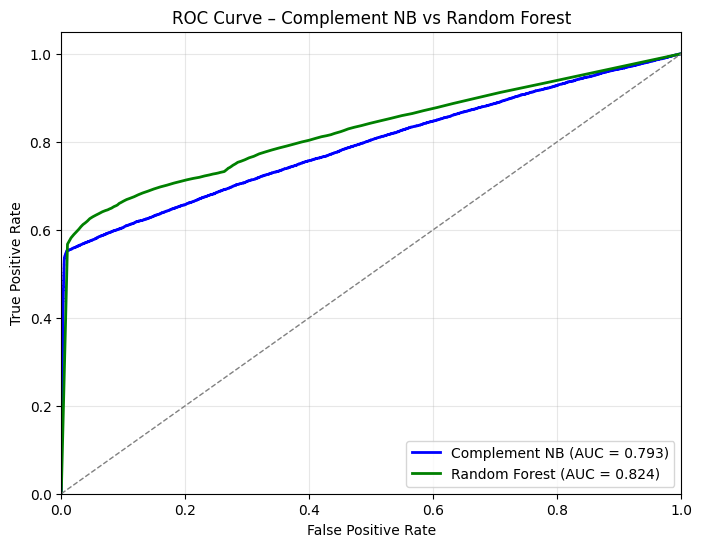

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# =====================================================
# PLOT ROC CURVE
# =====================================================
fpr_nb, tpr_nb, _ = roc_curve(y_true_all, y_pred_proba_nb_all)
fpr_rf, tpr_rf, _ = roc_curve(y_true_all, y_pred_proba_rf_all)

roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'Complement NB (AUC = {roc_auc_nb:.3f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # garis diagonal random
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Complement NB vs Random Forest')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


In [ ]:

from collections import Counter

# =====================================================
# FNR & FPR
# =====================================================
def calculate_rates(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(
        y_true, y_pred, labels=[0, 1]
    ).ravel()

    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return fnr, fpr

# =====================================================
# PARAMETER GRID (F1 ORIENTED)
# =====================================================
param_grid_rf = {
    'n_estimators': [200, 300],
    'max_depth': [None, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'class_weight': [None, 'balanced']
}

# =====================================================
# STRATIFIED K-FOLD
# =====================================================
skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# =====================================================
# INIT STORAGE
# =====================================================
rf_train_times, rf_pred_times, rf_memories = [], [], []
y_true_rf, y_pred_rf, y_pred_proba_rf = [], [], []

best_params_per_fold = []
best_f1_per_fold = []

# =====================================================
# CV LOOP – RANDOM FOREST
# =====================================================
for fold, (train_idx, test_idx) in enumerate(skf.split(X_final, y), start=1):

    print(f"\n========== FOLD {fold} ==========")

    X_train, X_test = X_final.iloc[train_idx], X_final.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # ================= RANDOM UNDER SAMPLING =================
    rus = RandomUnderSampler(random_state=42)
    X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

    # ================= GRID SEARCH =================
    tracemalloc.start()
    start_train = time.time()

    rf_base = RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    )

    grid_rf = GridSearchCV(
        estimator=rf_base,
        param_grid=param_grid_rf,
        scoring='f1',
        cv=5,
        n_jobs=-1
    )

    grid_rf.fit(X_train_rus, y_train_rus)
    end_train = time.time()

    # ================= BEST PARAMETER =================
    best_params_per_fold.append(grid_rf.best_params_)
    best_f1_per_fold.append(grid_rf.best_score_)

    print("Best Params :", grid_rf.best_params_)
    print(f"Best CV F1  : {grid_rf.best_score_:.4f}")

    # ================= PREDICTION =================
    start_pred = time.time()

    best_rf = grid_rf.best_estimator_

    y_pred = best_rf.predict(X_test)
    y_prob = best_rf.predict_proba(X_test)[:, 1]

    end_pred = time.time()

    _, peak_mem = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # ================= STORE =================
    rf_train_times.append(end_train - start_train)
    rf_pred_times.append(end_pred - start_pred)
    rf_memories.append(peak_mem / (1024 * 1024))

    y_true_rf.extend(y_test)
    y_pred_rf.extend(y_pred)
    y_pred_proba_rf.extend(y_prob)

# =====================================================
# BEST PARAMETER SUMMARY
# =====================================================
print("\n================ BEST PARAMETER PER FOLD =================")
for i, (params, score) in enumerate(zip(best_params_per_fold, best_f1_per_fold), start=1):
    print(f"Fold {i}")
    print("Params :", params)
    print(f"CV F1  : {score:.4f}\n")

param_counter = Counter(
    tuple(sorted(p.items())) for p in best_params_per_fold
)

dominant_params, freq = param_counter.most_common(1)[0]

print("=================================================")
print("BEST PARAMETER DOMINAN (PALING SERING MUNCUL)")
print(dict(dominant_params))
print("Muncul sebanyak:", freq, "fold")

# =====================================================
# EVALUASI FINAL RANDOM FOREST
# =====================================================
print("\n================ RANDOM FOREST FINAL =================")
print(classification_report(y_true_rf, y_pred_rf))

print("Accuracy :", accuracy_score(y_true_rf, y_pred_rf))
print("Precision:", precision_score(y_true_rf, y_pred_rf))
print("Recall   :", recall_score(y_true_rf, y_pred_rf))
print("F1-score :", f1_score(y_true_rf, y_pred_rf))

fnr, fpr = calculate_rates(y_true_rf, y_pred_rf)
print("FNR :", fnr)
print("FPR :", fpr)

# ================= ROC AUC =================
roc_auc_rf = roc_auc_score(y_true_rf, y_pred_proba_rf)
print("ROC AUC :", roc_auc_rf)

# ================= RESOURCE USAGE =================
print(f"TOTAL Training Time   : {np.sum(rf_train_times):.4f} detik")
print(f"TOTAL Prediction Time : {np.sum(rf_pred_times):.6f} detik")
print(f"PEAK Memory Usage     : {np.max(rf_memories):.2f} MB")



========== FOLD 1 ==========
Best Params : {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best CV F1  : 0.7930

========== FOLD 2 ==========
Best Params : {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best CV F1  : 0.7944

========== FOLD 3 ==========
Best Params : {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 300}
Best CV F1  : 0.7918

========== FOLD 4 ==========
Best Params : {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 300}
Best CV F1  : 0.7893

========== FOLD 5 ==========
Best Params : {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 300}
Best CV F1  : 0.7965

================ BEST PARAMETER PER FOLD =================
Fold 1
Params : {'class_weight': 'balanced', 'max_depth':

In [ ]:

# =====================================================
# FNR & FPR FUNCTION
# =====================================================
def calculate_rates(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(
        y_true, y_pred, labels=[0, 1]
    ).ravel()
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return fnr, fpr

# =====================================================
# PARAMETER GRID CNB
# =====================================================
param_grid_nb = {
    'alpha': [0.1, 0.3, 0.5, 1.0, 1.5, 2.0],
    'norm': [True, False]
}

# =====================================================
# STRATIFIED K-FOLD
# =====================================================
skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# =====================================================
# INIT STORAGE
# =====================================================
nb_train_times, nb_pred_times, nb_memories = [], [], []
y_true_nb, y_pred_nb, y_pred_proba_nb = [], [], []

# SIMPAN BEST PARAM
best_params_nb = []
best_f1_nb = []

# =====================================================
# CV LOOP – COMPLEMENT NAIVE BAYES
# =====================================================
for fold, (train_idx, test_idx) in enumerate(skf.split(X_final, y), start=1):

    print(f"\n========== FOLD {fold} ==========")

    X_train, X_test = X_final.iloc[train_idx], X_final.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # ================= RUS =================
    rus = RandomUnderSampler(random_state=42)
    X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

    # ================= SCALING =================
    scaler = MinMaxScaler()
    X_train_nb = scaler.fit_transform(X_train_rus)
    X_test_nb = scaler.transform(X_test)

    # ================= GRID SEARCH =================
    tracemalloc.start()
    start_train = time.time()

    nb_base = ComplementNB()
    grid_nb = GridSearchCV(
        estimator=nb_base,
        param_grid=param_grid_nb,
        scoring='f1',
        cv=5,
        n_jobs=-1
    )

    grid_nb.fit(X_train_nb, y_train_rus)
    end_train = time.time()

    # ================= SIMPAN BEST PARAMETER =================
    best_params_nb.append(grid_nb.best_params_)
    best_f1_nb.append(grid_nb.best_score_)

    print("Best Params :", grid_nb.best_params_)
    print(f"Best CV F1  : {grid_nb.best_score_:.4f}")

    # ================= PREDIKSI =================
    start_pred = time.time()

    best_nb = grid_nb.best_estimator_

    y_pred = best_nb.predict(X_test_nb)
    y_prob = best_nb.predict_proba(X_test_nb)[:, 1]

    end_pred = time.time()

    _, peak_mem = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # ================= STORE =================
    nb_train_times.append(end_train - start_train)
    nb_pred_times.append(end_pred - start_pred)
    nb_memories.append(peak_mem / (1024 * 1024))

    y_true_nb.extend(y_test)
    y_pred_nb.extend(y_pred)
    y_pred_proba_nb.extend(y_prob)

# =====================================================
# BEST PARAMETER PER FOLD
# =====================================================
print("\n================ BEST PARAMETER PER FOLD =================")
for i, (params, score) in enumerate(zip(best_params_nb, best_f1_nb), start=1):
    print(f"Fold {i}")
    print("Params :", params)
    print(f"CV F1  : {score:.4f}\n")

# =====================================================
# PARAMETER PALING DOMINAN
# =====================================================
param_counter_nb = Counter(
    tuple(sorted(p.items())) for p in best_params_nb
)

dominant_params_nb, freq_nb = param_counter_nb.most_common(1)[0]

print("=================================================")
print("BEST PARAMETER DOMINAN COMPLEMENT NAIVE BAYES")
print(dict(dominant_params_nb))
print("Muncul sebanyak:", freq_nb, "fold")

# =====================================================
# EVALUASI AKHIR
# =====================================================
print("\n================ COMPLEMENT NAIVE BAYES FINAL =================")
print(classification_report(y_true_nb, y_pred_nb))

print("Accuracy :", accuracy_score(y_true_nb, y_pred_nb))
print("Precision:", precision_score(y_true_nb, y_pred_nb))
print("Recall   :", recall_score(y_true_nb, y_pred_nb))
print("F1-score :", f1_score(y_true_nb, y_pred_nb))

fnr, fpr = calculate_rates(y_true_nb, y_pred_nb)
print("FNR :", fnr)
print("FPR :", fpr)

# ================= ROC AUC =================
roc_auc_nb = roc_auc_score(y_true_nb, y_pred_proba_nb)
print("ROC AUC :", roc_auc_nb)

# ================= RESOURCE SUMMARY =================
print(f"TOTAL Training Time   : {np.sum(nb_train_times):.4f} detik")
print(f"TOTAL Prediction Time : {np.sum(nb_pred_times):.6f} detik")
print(f"PEAK Memory Usage     : {np.max(nb_memories):.2f} MB")



========== FOLD 1 ==========
Best Params : {'alpha': 1.0, 'norm': False}
Best CV F1  : 0.7064

========== FOLD 2 ==========
Best Params : {'alpha': 1.0, 'norm': False}
Best CV F1  : 0.7098

========== FOLD 3 ==========
Best Params : {'alpha': 0.1, 'norm': False}
Best CV F1  : 0.7070

========== FOLD 4 ==========
Best Params : {'alpha': 0.1, 'norm': False}
Best CV F1  : 0.7059

========== FOLD 5 ==========
Best Params : {'alpha': 0.1, 'norm': False}
Best CV F1  : 0.7086

================ BEST PARAMETER PER FOLD =================
Fold 1
Params : {'alpha': 1.0, 'norm': False}
CV F1  : 0.7064

Fold 2
Params : {'alpha': 1.0, 'norm': False}
CV F1  : 0.7098

Fold 3
Params : {'alpha': 0.1, 'norm': False}
CV F1  : 0.7070

Fold 4
Params : {'alpha': 0.1, 'norm': False}
CV F1  : 0.7059

Fold 5
Params : {'alpha': 0.1, 'norm': False}
CV F1  : 0.7086

BEST PARAMETER DOMINAN COMPLEMENT NAIVE BAYES
{'alpha': 0.1, 'norm': False}
Muncul sebanyak: 3 fold

================ COMPLEMENT NAIVE BAYES FINAL ===

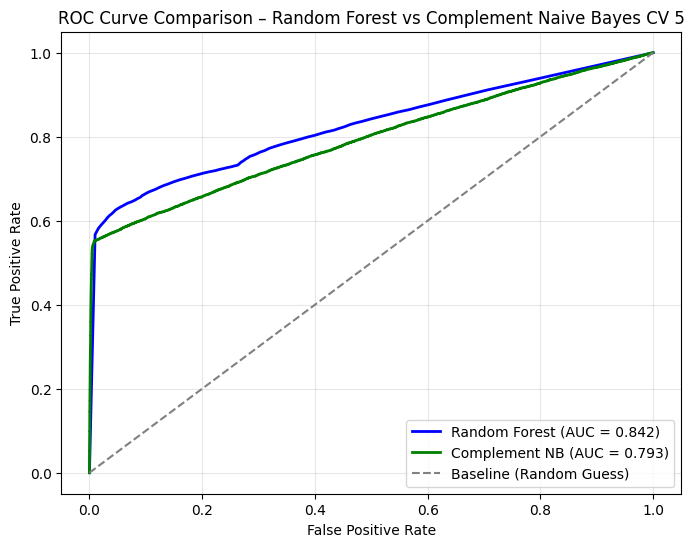

In [ ]:
# ================= ROC CURVE GABUNGAN =================
plt.figure(figsize=(8, 6))

# Random Forest (BLUE)
plt.plot(
    fpr_rf,
    tpr_rf,
    color="blue",
    lw=2,
    label=f'Random Forest (AUC = {roc_auc_rf:.3f})'
)

# Complement Naive Bayes (GREEN)
plt.plot(
    fpr_nb,
    tpr_nb,
    color="green",
    lw=2,
    label=f'Complement NB (AUC = {roc_auc_nb:.3f})'
)

# Diagonal baseline (GRAY)
plt.plot(
    [0, 1],
    [0, 1],
    linestyle='--',
    color="gray",
    lw=1.5,
    label="Baseline (Random Guess)"
)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison – Random Forest vs Complement Naive Bayes CV 5')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


In [ ]:
import joblib
import os

os.makedirs("models", exist_ok=True)

file_path = "models/rf_baseline_cv5.pkl"

joblib.dump(
    {
        "scaler": scaler_rf,
        "feature_selector": None,
        "model": rf_model,
        "features": list(X_final.columns),
        "model_type": "RF Baseline (no refit)"
    },
    file_path
)

size_mb = os.path.getsize(file_path) / (1024 * 1024)
print("✅ RF Baseline disimpan")
print(f"📦 Size: {size_mb:.2f} MB")

✅ RF Baseline disimpan
📦 Size: 58.11 MB


In [ ]:
file_path = "models/rf_tuned_cv5.pkl"

joblib.dump(
    {
        "scaler": scaler_rf,
        "feature_selector": None,
        "model": best_rf,
        "features": list(X_final.columns),
        "model_type": "RF Tuned (CV, no refit)"
    },
    file_path
)

size_mb = os.path.getsize(file_path) / (1024 * 1024)
print("✅ RF Tuned disimpan")
print(f"📦 Size: {size_mb:.2f} MB")


✅ RF Tuned disimpan
📦 Size: 49.93 MB


In [ ]:
file_path = "models/cnb_baseline_cv5.pkl"

joblib.dump(
    {
        "scaler": scaler_nb,
        "model": nb_model,
        "features": list(X_final.columns),
        "model_type": "CNB Baseline (no refit)"
    },
    file_path
)

size_mb = os.path.getsize(file_path) / (1024 * 1024)
print("✅ CNB Baseline disimpan")
print(f"📦 Size: {size_mb:.4f} MB")

✅ CNB Baseline disimpan
📦 Size: 0.0023 MB


In [ ]:
file_path = "models/cnb_tuned_cv5.pkl"

joblib.dump(
    {
        "scaler": scaler,
        "model": best_nb,
        "features": list(X_final.columns),
        "model_type": "CNB Tuned (CV, no refit)"
    },
    file_path
)

size_mb = os.path.getsize(file_path) / (1024 * 1024)
print("✅ CNB Tuned disimpan")
print(f"📦 Size: {size_mb:.4f} MB")


✅ CNB Tuned disimpan
📦 Size: 0.0023 MB
